***Imports and Data Entry***

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

In [15]:
file_path = 'data/Sample of San Diego AQI.csv'
df = pd.read_csv(file_path).set_index('City')

***Heatmap of AQI in Each Region*** 

The colors are given by the AQI: **{'Green': 'Good', 'Yellow': 'Moderate', 'Red': 'Unhealthy for Sensitive Groups'}**

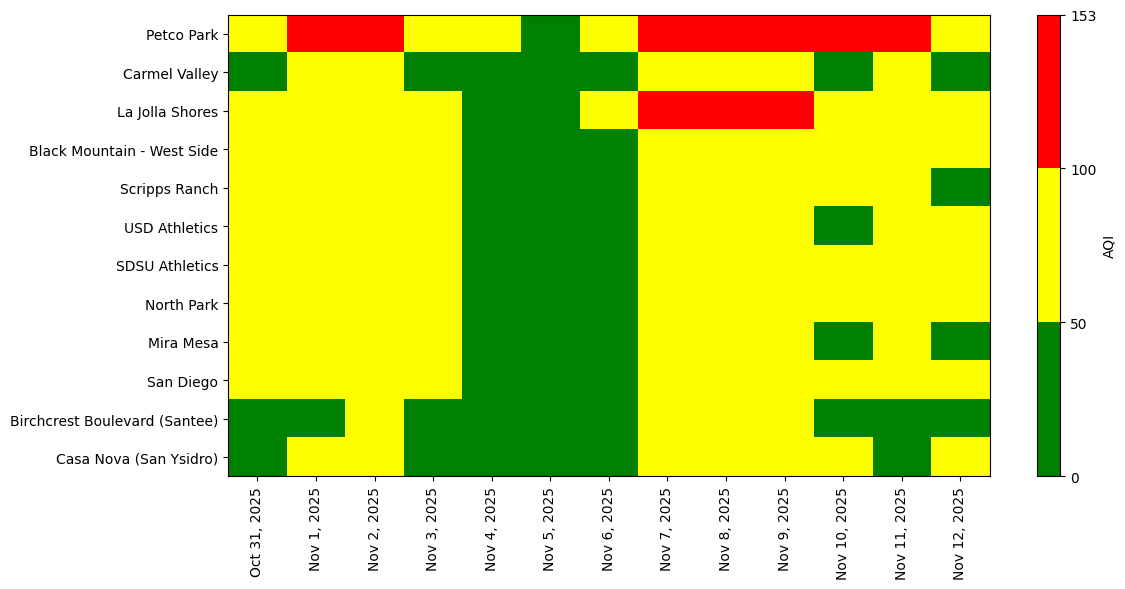

In [20]:
colors = ["green", "yellow", "red"]

bounds = [0, 50, 100, df.max().max()]

cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(12, 6))
plt.imshow(df, aspect='auto', cmap=cmap, norm=norm)

plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.index)), df.index)
plt.colorbar(label="AQI")
plt.tight_layout()
plt.show()


***Graph per City to Show Change***

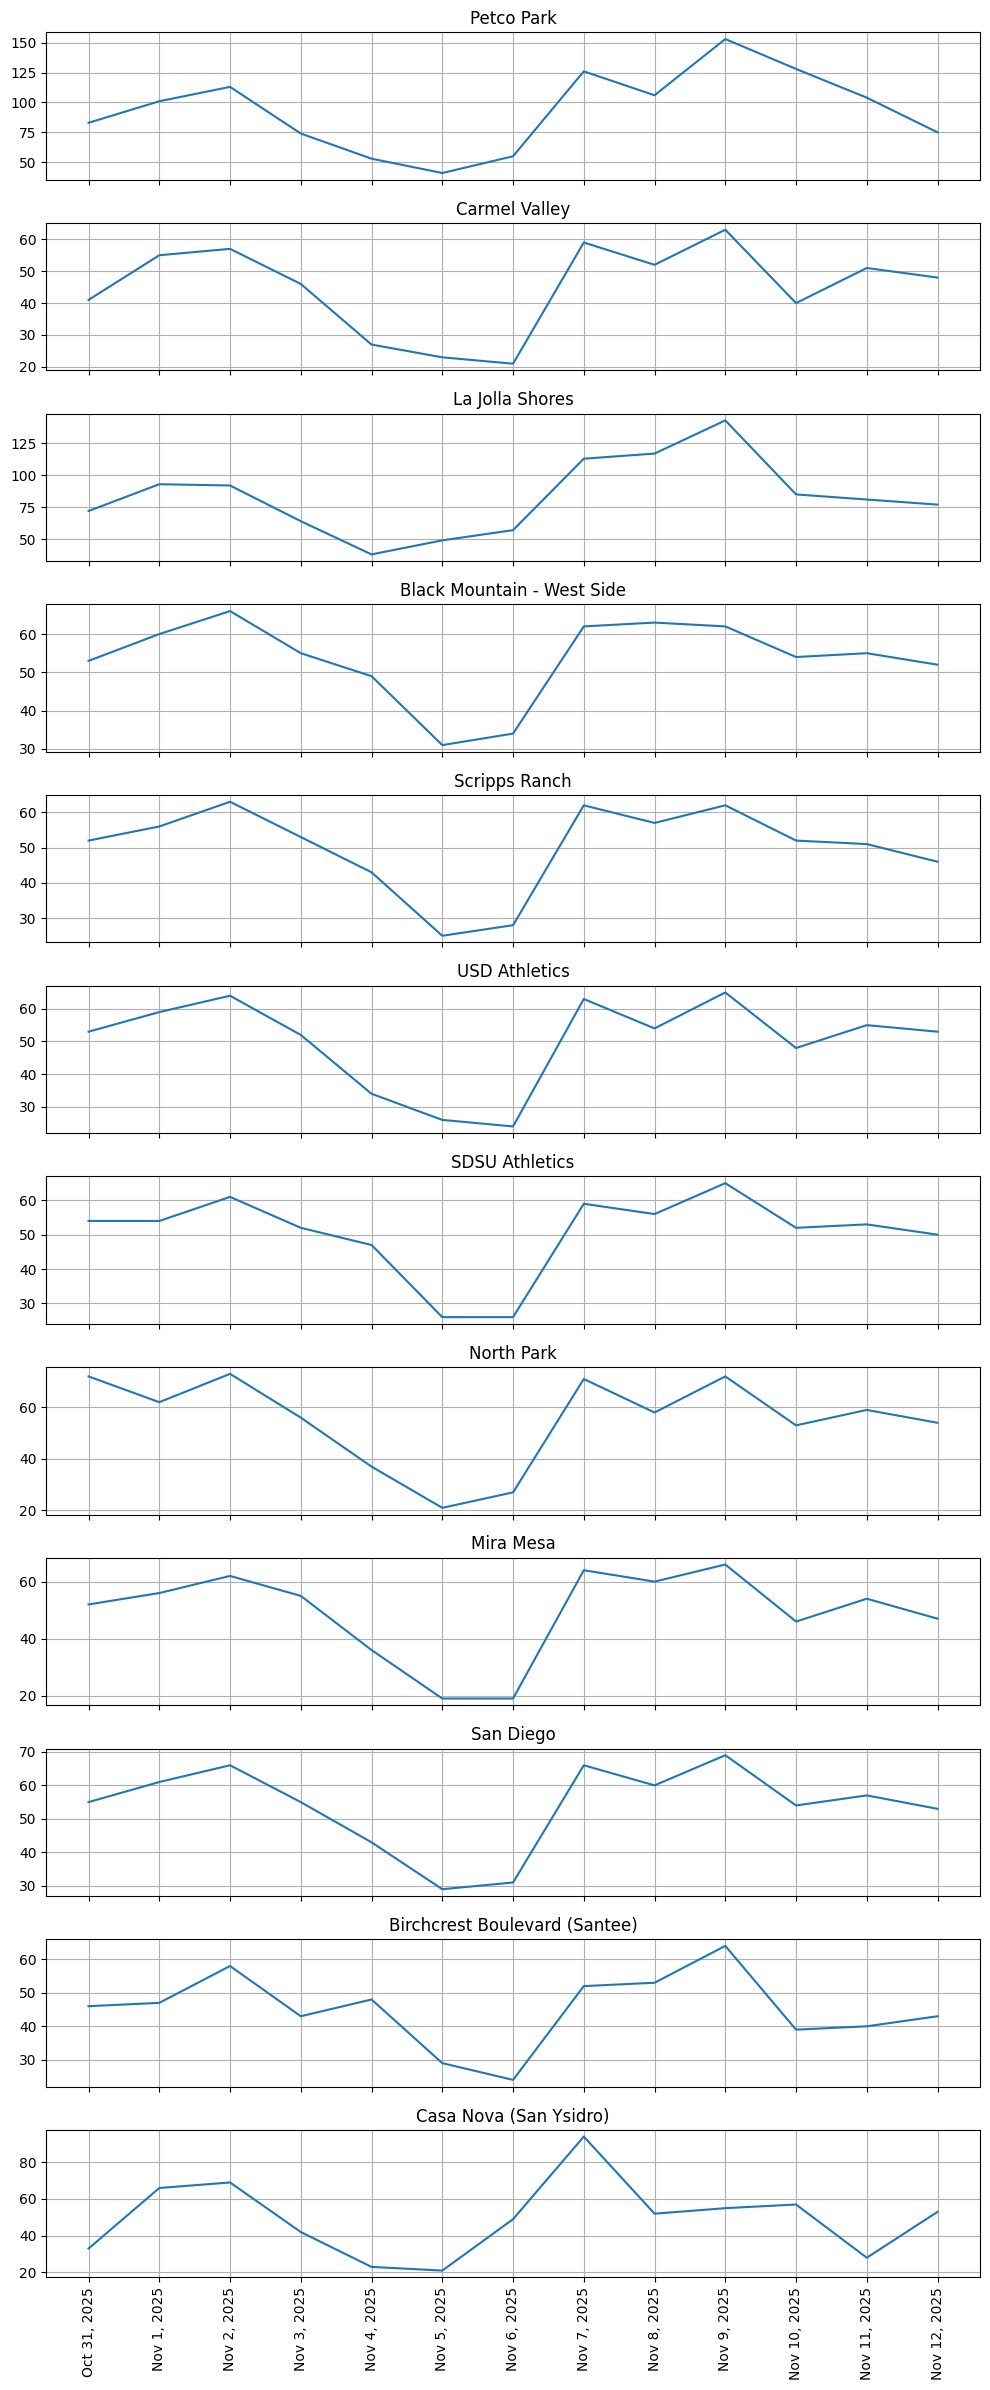

In [21]:
num_rows = df.shape[0]
fig, axes = plt.subplots(num_rows, 1, figsize=(10, num_rows * 2), sharex=True)

for i, (city, row) in enumerate(df.iterrows()):
    axes[i].plot(df.columns, row.values)
    axes[i].set_title(city)
    axes[i].grid(True)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

***Quick Summary of Cities and Their Avg, Best, and Worst AQI Score***

In [24]:
summary = pd.DataFrame({
    "Avg AQI": df.mean(axis=1),
    "Best (Lowest) AQI": df.min(axis=1),
    "Worst (Highest) AQI": df.max(axis=1)
}).sort_values("Avg AQI")

summary

,Avg AQI,Best (Lowest) AQI,Worst (Highest) AQI
City,,,
Carmel Valley,44.846154,21,63
Birchcrest Boulevard (Santee),45.076923,24,64
Mira Mesa,48.923077,19,66
Casa Nova (San Ysidro),49.384615,21,94
USD Athletics,50.000000,24,65
Scripps Ranch,50.000000,25,63
SDSU Athletics,50.384615,26,65
Black Mountain - West Side,53.538462,31,66
San Diego,53.769231,29,69


***Which Cities have the highest variability in their AQI score?***

In [26]:
variability = pd.DataFrame({
    "AQI Std Dev (Variability)": df.std(axis=1),
    "AQI Range": df.max(axis=1) - df.min(axis=1)
}).sort_values("AQI Std Dev (Variability)", ascending=False)

variability

,AQI Std Dev (Variability),AQI Range
City,,
Petco Park,33.166634,112
La Jolla Shores,29.182889,105
Casa Nova (San Ysidro),20.500156,73
North Park,17.083130,52
Mira Mesa,15.558821,47
Carmel Valley,13.795205,42
USD Athletics,13.680887,41
San Diego,12.530987,40
Scripps Ranch,12.020815,38
